<a href="https://colab.research.google.com/github/rorgt/2024-term-project/blob/main/CoLab_TermProj_GO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GO term enrichment analysis for CLIP and ribosome profiling (Fig 5A)

* Each circle represents a **GO term**.
* The **color intensity** indicates statistical significance of enrichment or depletion determined by **Mann-Whitney U test**.
* The **size of the circle** corresponds to **the number of genes**.
* The **coordinates** indicate average CLIP tag enrichment (x axis) and ribosome density change (y axis). **= TermProj_2024_1**
* Balloons contain the **number of genes** (written in parentheses) and p values for CLIPseq (C) and ribosome footprinting (R).
* *Note that nucleosome-related terms are overestimated artificially in CLIP because of a normalization problem due to the lack of polyA tail in histone mRNAs.*



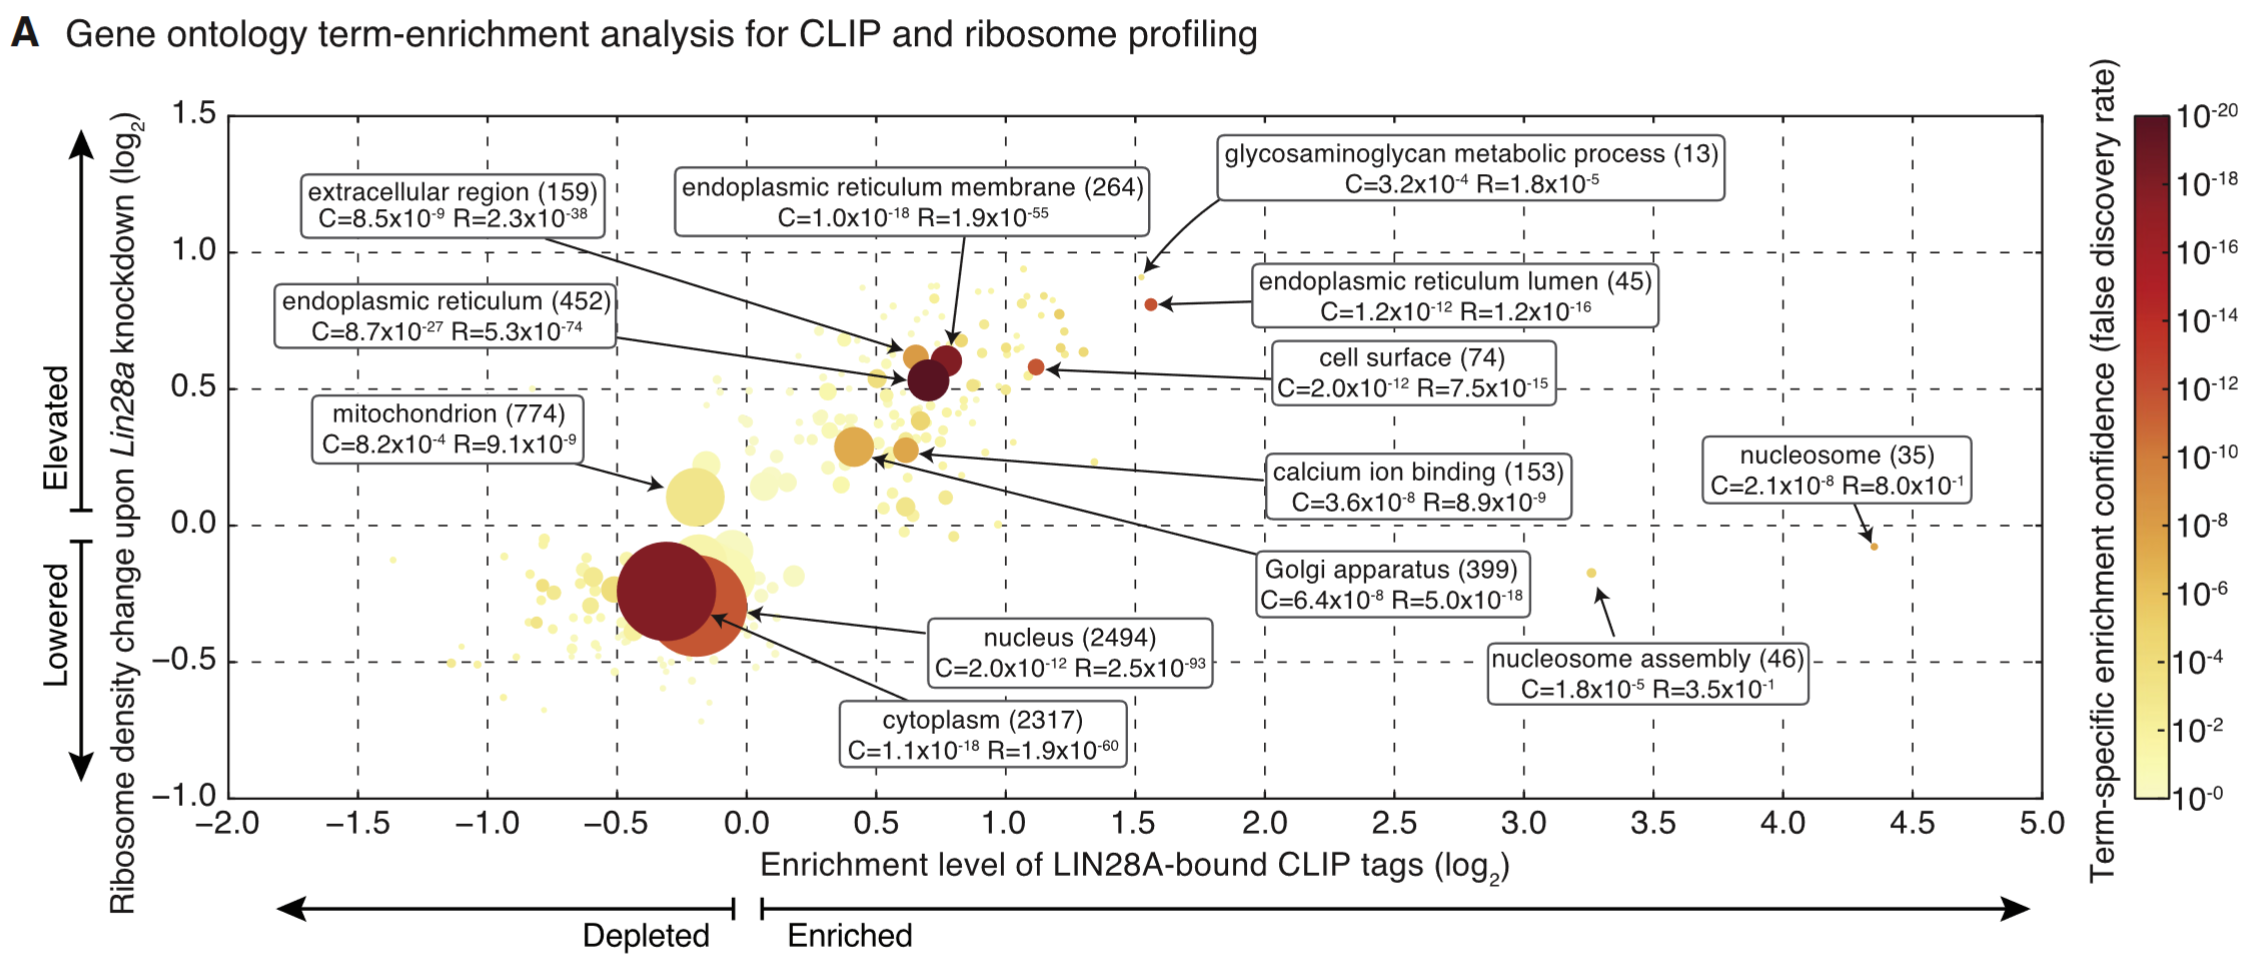

## Transcript count table


* TermProj_2024_1과 동일한 환경 설정, 시퀀싱 데이터 다운로드 과정임.
* 런타임 연결마다 모두 실행하면 됨.


In [1]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 실습용 biconda 환경
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Receiving objects: 100% (76/76), 318.16 KiB | 7.23 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.profile
./root/.tmux.conf
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.bin.priority/pip
./root/.vimrc
./root/.bashrc.biolab
./root/.condarc
--2024-06-08 06:20:13--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143808873 (137M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 137.15M  8

In [3]:
# 시퀀싱 데이터 다운로드 (이미 진행하여 생략, 체크섬 생략)
# !ls -al /content/drive/MyDrive/binfo1-datapack1/

In [4]:
# 프로그램 추가 설치 (이미 featurecount 진행하여 생략)
# !conda install -y subread

In [5]:
# 작업 디렉토리 만들고 복사하기 (이미 진행하여 생략)
# !mkdir /content/drive/MyDrive/binfo1-work
# !chmod +777 /content/drive/MyDrive/binfo1-work
# !cp -f /content/drive/MyDrive/binfo1-datapack1/*.* /content/drive/MyDrive/binfo1-work/

In [6]:
%cd /content/drive/MyDrive/binfo1-work

/content/drive/MyDrive/binfo1-work


In [7]:
# bam (aligned reads), gtf (annotation) -> gene 별 read count (이미 진행하여 생략)
# !featureCounts -a gencode.gtf -o read-counts.txt *.bam

## Gene ID별 GO, 좌표 table

* transcript count table 중 발현이 낮은 값을 제거한 뒤 좌표 값을 계산함.
* GO는 Biomart에서 .tsv로 받았음. (6/6/24 기준 빌드 버전 GRCm39)
* 버전 제거 Gene ID를 기준으로 좌표와 GO를 합친 dataframe을 생성함.

In [102]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)

print(cnts.shape)
cnts.head()

(55359, 13)


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0


In [125]:
# count가 낮은 gene 정리
fcnts = cnts[(cnts['CLIP-35L33G.bam'] > 0) &
  (cnts['RNA-control.bam'] > 30) &    # low read counts in RNA-seq
  (cnts['RPF-siLin28a.bam'] > 0) &
  (cnts['RNA-siLin28a.bam'] > 0) &
  (cnts['RPF-siLuc.bam'] > 0) &
  (cnts['RNA-siLuc.bam'] > 80)       # low ribosome footprints (raw footprint tags in siLuc library)
  ]

# 필요한 column만 남김
fcnts = fcnts[
    ['CLIP-35L33G.bam', 'RNA-control.bam', 'RPF-siLin28a.bam', 'RNA-siLin28a.bam', 'RPF-siLuc.bam', 'RNA-siLuc.bam']
    ]

print(fcnts.shape)
fcnts.head()

(9519, 6)


,CLIP-35L33G.bam,RNA-control.bam,RPF-siLin28a.bam,RNA-siLin28a.bam,RPF-siLuc.bam,RNA-siLuc.bam
Geneid,,,,,,
ENSMUSG00000102343.2,67,31,1,207,2,157
ENSMUSG00000103922.2,183,95,42,93,75,100
ENSMUSG00000033845.14,4014,1355,1859,3022,3191,2563
ENSMUSG00000025903.15,2045,574,33,1219,44,1236
ENSMUSG00000033813.16,1658,762,328,2130,609,2225


In [126]:
# scatter의 좌표가 될 column 추가 (TermProj_2024_1)
fcnts['clip_enrichment'] = fcnts['CLIP-35L33G.bam'] / fcnts['RNA-control.bam']
fcnts['rden_change'] = (fcnts['RPF-siLin28a.bam'] / fcnts['RNA-siLin28a.bam']) / (fcnts['RPF-siLuc.bam'] / fcnts['RNA-siLuc.bam'])

# index를 해제한 후 버전 제거한 gene ID column 추가
fcnts.reset_index(inplace=True)
fcnts['Gene stable ID'] = fcnts['Geneid'].str.split('.').str.get(0)

# 새로운 좌표 데이터프레임 생성
columns_to_keep_2 = ['Gene stable ID', 'clip_enrichment', 'rden_change']
gene_clip_rden = fcnts[columns_to_keep_2]

gene_clip_rden.head()

,Gene stable ID,clip_enrichment,rden_change
0,ENSMUSG00000102343,2.161290,0.379227
1,ENSMUSG00000103922,1.926316,0.602151
2,ENSMUSG00000033845,2.962362,0.494091
3,ENSMUSG00000025903,3.562718,0.760459
4,ENSMUSG00000033813,2.175853,0.562609


In [127]:
# GO from Ensembl Biomart
gene_go = pd.read_csv('GO_mart_GRCm39.tsv', sep='\t').dropna()

print(gene_go.shape)
gene_go.head()

(373180, 4)


,Gene stable ID,GO term name,GO term accession,GO domain
0,ENSMUSG00000064336,translational elongation,GO:0006414,biological_process
1,ENSMUSG00000064336,triplet codon-amino acid adaptor activity,GO:0030533,molecular_function
2,ENSMUSG00000064336,mitochondrion,GO:0005739,cellular_component
3,ENSMUSG00000064337,ribosomal small subunit assembly,GO:0000028,biological_process
4,ENSMUSG00000064337,translation,GO:0006412,biological_process


In [128]:
# Gene ID를 기준으로 GO와 좌표를 inner join
gene_go = gene_go.merge(gene_clip_rden, on='Gene stable ID', how='inner')

print(gene_go.shape)
gene_go.head()

(179905, 6)


,Gene stable ID,GO term name,GO term accession,GO domain,clip_enrichment,rden_change
0,ENSMUSG00000064337,ribosomal small subunit assembly,GO:0000028,biological_process,3.541547,1.332722
1,ENSMUSG00000064337,translation,GO:0006412,biological_process,3.541547,1.332722
2,ENSMUSG00000064337,structural constituent of ribosome,GO:0003735,molecular_function,3.541547,1.332722
3,ENSMUSG00000064337,mitochondrial small ribosomal subunit,GO:0005763,cellular_component,3.541547,1.332722
4,ENSMUSG00000064339,translation,GO:0006412,biological_process,6.092899,1.614097


## GO term별 차이를 확인


In [136]:
# Group by 'GO term name'
go_stat = gene_go.groupby('GO term name').agg(
    num_genes = ('Gene stable ID', 'nunique'),
    clip_avg = ('clip_enrichment', 'mean'),
    rden_avg = ('rden_change', 'mean')
)
go_stat.sort_values(by='num_genes', ascending=False, inplace=True)

print(go_stat.shape)
go_stat.head()

(14998, 3)


,num_genes,clip_avg,rden_avg
GO term name,,,
cytoplasm,4254,2.143511,0.535956
nucleus,4027,2.189649,0.526391
protein binding,3854,2.392317,0.567904
membrane,3115,3.150775,0.727806
cytosol,2707,2.080204,0.526387


In [137]:
# Mann-Whitney U test (30초 걸림)
import numpy as np
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(group, column):
    if len(group[column].unique()) > 1:  # Perform test only if there are at least two unique values
        stat, p_value = mannwhitneyu(group[column], np.random.normal(size=len(group[column])))
        return p_value
    else:
        return np.nan

go_stat['clip_p_val'] = gene_go.groupby('GO term name').apply(mann_whitney_u_test, 'clip_enrichment').values
go_stat['rden_p_val'] = gene_go.groupby('GO term name').apply(mann_whitney_u_test, 'rden_change').values

go_stat.dropna(inplace=True)

print(go_stat.shape)
go_stat.head()

(10060, 5)


,num_genes,clip_avg,rden_avg,clip_p_val,rden_p_val
GO term name,,,,,
cytoplasm,4254,2.143511,0.535956,0.002331,0.317599
nucleus,4027,2.189649,0.526391,0.666667,0.333333
membrane,3115,3.150775,0.727806,0.004329,0.393939
nucleoplasm,2409,2.098282,0.517774,0.400000,0.700000
metal ion binding,2021,2.583817,0.585926,0.004662,0.878477


In [131]:
# FDR correction
from statsmodels.stats.multitest import multipletests

clip_p_values = go_stat['clip_p_val']
rden_p_values = go_stat['rden_p_val']

go_stat['clip_fdr'] = multipletests(clip_p_values, method='fdr_bh')[1]
go_stat['rden_fdr'] = multipletests(rden_p_values, method='fdr_bh')[1]

print(go_stat.shape)
go_stat.head()

(10060, 8)


,GO term name,num_genes,clip_avg,rden_avg,clip_p_val,rden_p_val,clip_fdr,rden_fdr
0,'de novo' AMP biosynthetic process,7,1.529098,0.327918,0.128205,0.710373,0.195801,0.835928
1,'de novo' CTP biosynthetic process,2,1.638764,0.323379,0.333333,0.333333,0.372179,0.524345
3,'de novo' IMP biosynthetic process,6,1.251018,0.313293,0.064935,1.000000,0.121962,1.000000
5,'de novo' UMP biosynthetic process,3,1.023534,0.366303,0.100000,1.000000,0.156869,1.000000
6,'de novo' XMP biosynthetic process,8,1.015974,0.317794,0.234499,0.959130,0.333200,1.000000


## 그래프 그리기

In [132]:
# For easier visualization
go = go_stat[(go_stat['clip_fdr'] < 0.05) & (go_stat['rden_fdr'] < 0.05)].copy()

go.drop(['clip_p_val','rden_p_val'], axis=1, inplace=True)


print(go.shape)
go.head(20)

(1367, 6)


,GO term name,num_genes,clip_avg,rden_avg,clip_fdr,rden_fdr
7636,negative regulation of amyloid precursor prote...,6,3.858173,0.723563,0.013169,0.020331
6202,killing of cells of another organism,6,1.272765,0.573001,0.022414,0.034210
7158,mitochondrial outer membrane translocase complex,6,4.066347,0.748080,0.022414,0.020331
7361,morphogenesis of embryonic epithelium,6,1.816604,0.717009,0.013169,0.020331
11477,protein maturation by [4Fe-4S] cluster transfer,6,1.480146,0.699064,0.013169,0.020331
13319,response to transforming growth factor beta,6,3.035793,0.597710,0.013169,0.020331
13272,response to pH,6,4.368125,0.925987,0.007324,0.020331
2379,arachidonic acid metabolic process,6,3.406484,0.889274,0.007324,0.020331
12787,regulation of release of sequestered calcium i...,6,3.154724,0.530878,0.013169,0.020331
8726,nitric oxide mediated signal transduction,6,0.852270,0.631969,0.013169,0.020331


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

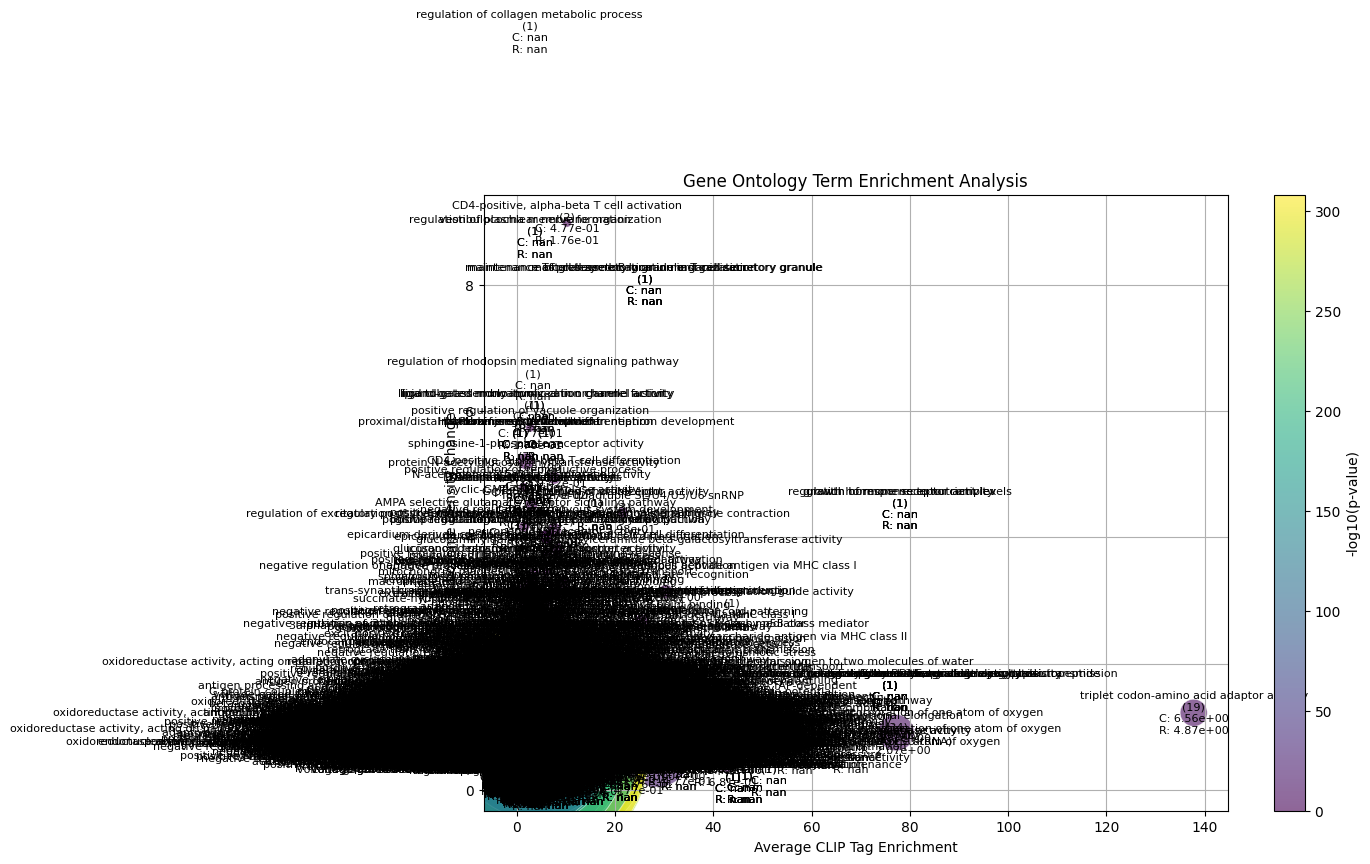

In [20]:
# Normalize sizes for plotting
sizes = go_summary['Num_Genes'] * 20  # Scale up for better visualization
color_intensity = go_summary[['CLIP_Tag_Significance', 'Rden_Change_Significance']].max(axis=1)

# Scatter plot
plt.figure(figsize=(12, 8))

sc = plt.scatter(
    go_summary['Avg_CLIP_Enrichment'],
    go_summary['Avg_Rden_Change'],
    s=sizes,
    c=color_intensity,
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Add a color bar
cbar = plt.colorbar(sc)
cbar.set_label('-log10(p-value)')

# Add text annotations
for i, row in go_summary.iterrows():
    plt.text(row['Avg_CLIP_Enrichment'], row['Avg_Rden_Change'],
             f"{row['GO term name']}\n({row['Num_Genes']})\nC: {row['CLIP_Tag_Significance']:.2e}\nR: {row['Rden_Change_Significance']:.2e}",
             fontsize=8, ha='center', va='center')

plt.xlabel('Average CLIP Tag Enrichment')
plt.ylabel('Ribosome Density Change')
plt.title('Gene Ontology Term Enrichment Analysis')
plt.grid(True)
plt.show()

## Backup
* 작동하지 않지만 챗gpt한테 물어본 코드 백업함. (실행하지 말 것!)

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# 샘플 데이터프레임 생성
data = {
    'Gene stable ID': ['ENSMUSG00000064337', 'ENSMUSG00000064337', 'ENSMUSG00000064337', 'ENSMUSG00000064337', 'ENSMUSG00000064338'],
    'GO term name': ['ribosomal small subunit assembly', 'translation', 'structural constituent of ribosome', 'mitochondrial small ribosomal subunit', 'translational elongation'],
    'GO term accession': ['GO:0000028', 'GO:0006412', 'GO:0003735', 'GO:0005763', 'GO:0006414'],
    'GO domain': ['biological_process', 'biological_process', 'molecular_function', 'cellular_component', 'biological_process'],
    'clip_enrichment': [3.541547, 3.541547, 3.541547, 3.541547, 89.928571],
    'rden_change': [1.332722, 1.332722, 1.332722, 1.332722, 3.799743]
}

df = pd.DataFrame(data)

# 빈 데이터프레임 생성
results = []

# 각 GO term별로 그룹화하여 평균 clip_enrichment와 rden_change 계산 및 t-test 수행
for name, group in df.groupby('GO term name'):
    # 그룹 평균 계산
    mean_clip_enrichment = group['clip_enrichment'].mean()
    mean_rden_change = group['rden_change'].mean()

    # 모든 데이터프레임에서 GO term이 없는 데이터와 비교 (샘플 데이터에는 없으므로 빈 데이터프레임으로 예시)
    has_go_term = group[['clip_enrichment', 'rden_change']]
    no_go_term = df[~df['GO term name'].isin([name])][['clip_enrichment', 'rden_change']]

    # t-검정 수행
    clip_enrichment_pvalue = ttest_ind(has_go_term['clip_enrichment'], no_go_term['clip_enrichment'], nan_policy='omit')[1] if not no_go_term.empty else float('nan')
    rden_change_pvalue = ttest_ind(has_go_term['rden_change'], no_go_term['rden_change'], nan_policy='omit')[1] if not no_go_term.empty else float('nan')

    # 결과 저장
    results.append({
        'GO term name': name,
        'mean_clip_enrichment': mean_clip_enrichment,
        'mean_rden_change': mean_rden_change,
        'clip_enrichment_pvalue': clip_enrichment_pvalue,
        'rden_change_pvalue': rden_change_pvalue
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

print("GO term 별 통계 결과:\n", results_df)


In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np

# Group data by GO term
grouped = data.groupby('GO_Term')

# Calculate the number of genes and mean values for each GO term
go_summary = grouped.agg({
    'Gene': 'count',
    'CLIP_Tag_Enrichment': 'mean',
    'Ribosome_Density_Change': 'mean'
}).rename(columns={'Gene': 'Num_Genes'})

# Perform Mann-Whitney U test for statistical significance
p_values_clip = []
p_values_ribo = []

for go_term, group in grouped:
    clip_values = group['CLIP_Tag_Enrichment']
    ribo_values = group['Ribosome_Density_Change']
    _, p_clip = mannwhitneyu(clip_values, data['CLIP_Tag_Enrichment'])
    _, p_ribo = mannwhitneyu(ribo_values, data['Ribosome_Density_Change'])
    p_values_clip.append(p_clip)
    p_values_ribo.append(p_ribo)

go_summary['P_Value_CLIP'] = p_values_clip
go_summary['P_Value_Ribo'] = p_values_ribo

# Normalize p-values for color intensity
go_summary['Color_Intensity'] = -np.log10(go_summary[['P_Value_CLIP', 'P_Value_Ribo']].min(axis=1))

print(go_summary.head())

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Scatter plot with varying sizes and colors
plt.figure(figsize=(12, 8))

# Normalize sizes for plotting
sizes = go_summary['Num_Genes'] * 10  # Scale up for better visualization

# Scatter plot
sc = plt.scatter(
    go_summary['CLIP_Tag_Enrichment'],
    go_summary['Ribosome_Density_Change'],
    s=sizes,
    c=go_summary['Color_Intensity'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Add a color bar
cbar = plt.colorbar(sc)
cbar.set_label('-log10(p-value)')

# Add text annotations
for i, row in go_summary.iterrows():
    plt.text(row['CLIP_Tag_Enrichment'], row['Ribosome_Density_Change'],
             f"{i}\n({row['Num_Genes']})\nC: {row['P_Value_CLIP']:.2e}\nR: {row['P_Value_Ribo']:.2e}",
             fontsize=8, ha='center', va='center')

plt.xlabel('Average CLIP Tag Enrichment')
plt.ylabel('Ribosome Density Change')
plt.title('Gene Ontology Term Enrichment Analysis')
plt.grid(True)
plt.show()
